Similarly to the previously mentioned , step-function, which only activated on values >= 0, other ***Activation Functions*** output a ***gradient*** of activation when triggered. This allows for non-linear problems to be tackled, since the world we live in cannot only be seen through linear relationships.<p>
Activation functions are found in the output of ***Hidden Layers***. And in the final ***Output Layer***

Two of the most important Activation Funcations are: 
* ***ReLU*** (Rectified Linear Unit)
* ***Sigmoid***

### ReLU

RelU is one of the most popular ***Activation Functions***, as it is one of the simplest - non-linear functions that can be used.<br>
Every input smaller or equal to `0` results in `0`, everything bigger is of the linear relationship `x=y`

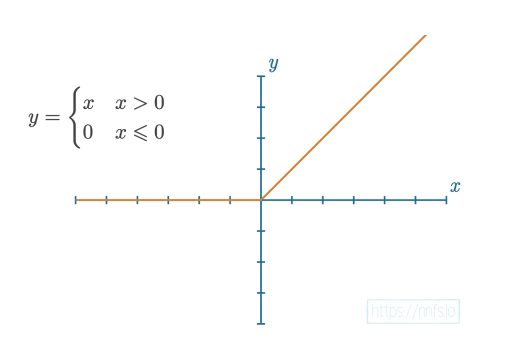

ReLU's can be modified when added to Neurons, <br>
***Biases*** shift the function left or right, here by `0.5 + ` on the x-axes <br>
***Weights*** if the weights are negative, the function is flipped, here `-1.00`

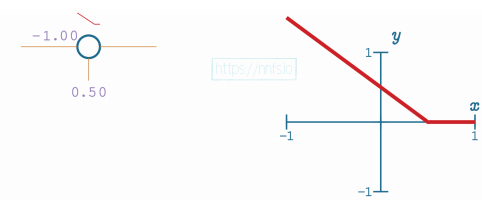

Passed on multiple Neurons, the ***ReLU*** function allows for introducing one additional **deactivation points** (kinks)

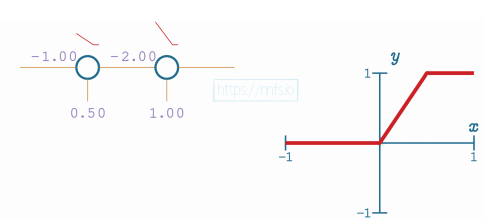

Introducing this technique on a network with two layers, we can more closely approximate our `sin` function, which is a ***non - linear function***.

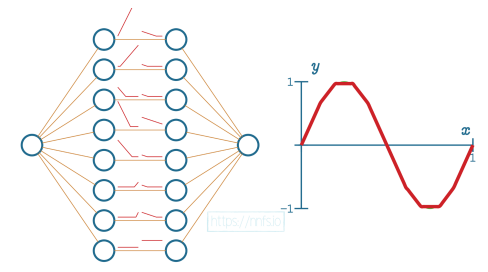

While this is a singly connected network, ***a fully connected layer*** leads to even more precision.

### ReLU - Code

In [1]:
import numpy as np


In [2]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = []
for i in inputs:
    output.append(i) if i > 0 else output.append(0)
    
# in numpy land we simply can do the following instead
output = np.maximum(0, inputs)
print(output)


[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [3]:
class Activation_ReLU:
    
    # Forward Pass
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [7]:
%%capture 
# we hide the output of the cell
# we simply import the previous chapter
%run -i Chapter_3_Adding_Layers.ipynb 

In [8]:
# we refer to the class from the previous chapter
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


### Softmax

The ***Softmax Activation*** function is used for final output, since it has the following attributes which are useful for our classification network:
* ***normalizes input*** accross predicted classes using $e^x$
* ***confidence scores*** the outputs repsresent a confidence score, which we use for backpropagation

<div>
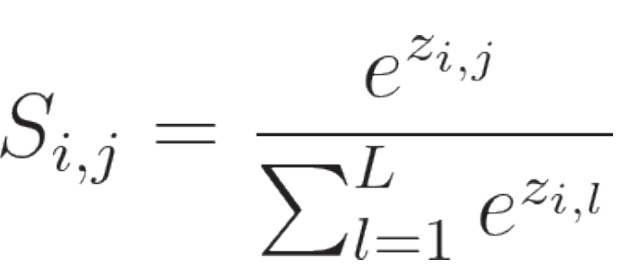
</div>

In the ***nominator***, 

$e^{z_{i,j}}$

* $e$ - the Euler number to the power of 
* $z$ - a singular output value
* $i,j$ - the index, and j the output of the current sample

In the ***denominator***,

$\sum_{l=1}^L e^{z_{i,l}}$

* the Sum of all the exponentiated outputs for a sample $i$

***exponential function*** $e^x$ makes any negative value postive <br>
***division*** since we divide against ***all*** exponated values we receive a probability

An example of the outputs of the ***exponential function*** $e^x$ is:

In [18]:
print(f'negative infinity = {np.exp(-np.inf)} \ne ** 0 = {np.exp(0)} \nexponential growth = {np.exp(5)}')

negative infinity = 0.0 
e ** 0 = 1.0 
exponential growth = 148.4131591025766


We combine the two advantages in softmax, 
* ***only positive values***
* ***normalization - values between 0 and 1*** no matter how large the input

In [20]:
class Activation_Softmax:
    
    def forward(self, inputs):
        # we subtract the largest values from the inputs
        # keepdims = we keep the dimensions
        # axis = 0 = rows, 1 = cols
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

In [25]:
softmax = Activation_Softmax()
softmax.forward([[0, -2, 1]])
print(softmax.output)

[[0.25949646 0.03511903 0.70538451]]


In [28]:
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.3333334  0.3333334  0.33333316]
 [0.33333358 0.33333352 0.33333287]
 [0.33333376 0.33333367 0.3333326 ]
 [0.33333388 0.33333376 0.33333233]]
